In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [259]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import normalize
from matplotlib import pyplot as plt
import torch
import matplotlib
import itertools

matplotlib.rcParams['figure.figsize'] = (4, 4)

# Tools

In [260]:
def scatter(X, title=None, ax=None, show_axes=False):
    if ax is None:
        ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], s=10)
    if title is not None:
        ax.set_title(title)
    if not show_axes:
        ax.set_xticklabels([])
        ax.set_yticklabels([])

# Toy dataset

$X \in [0, 1]^{d,N}$

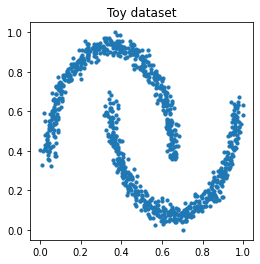

In [284]:
N_SAMPLES = 1000

dataset = make_moons(n_samples=N_SAMPLES, noise=0.05)
X, _ = dataset
X =  X + abs(X.min(axis=0)) # shift to positive
X = X / X.max(axis=0) # normalize
X = torch.from_numpy(X).float()

scatter(X, title="Toy dataset", show_axes=True)

# Forward

In [285]:
T = 1000
NB_DISPLAY = 10

In [286]:
def forward(X_0, betas):
    assert len(betas) == T
    X_t = X_0
    for beta, t in zip(betas, range(T)):
        if t % (T // NB_DISPLAY) == 0:
            yield X_t
        X_t = (1 - beta)**0.5 * X_t + beta**0.5 * torch.normal(0, 1, X_0.shape)
    return X

## With fixed $\beta$

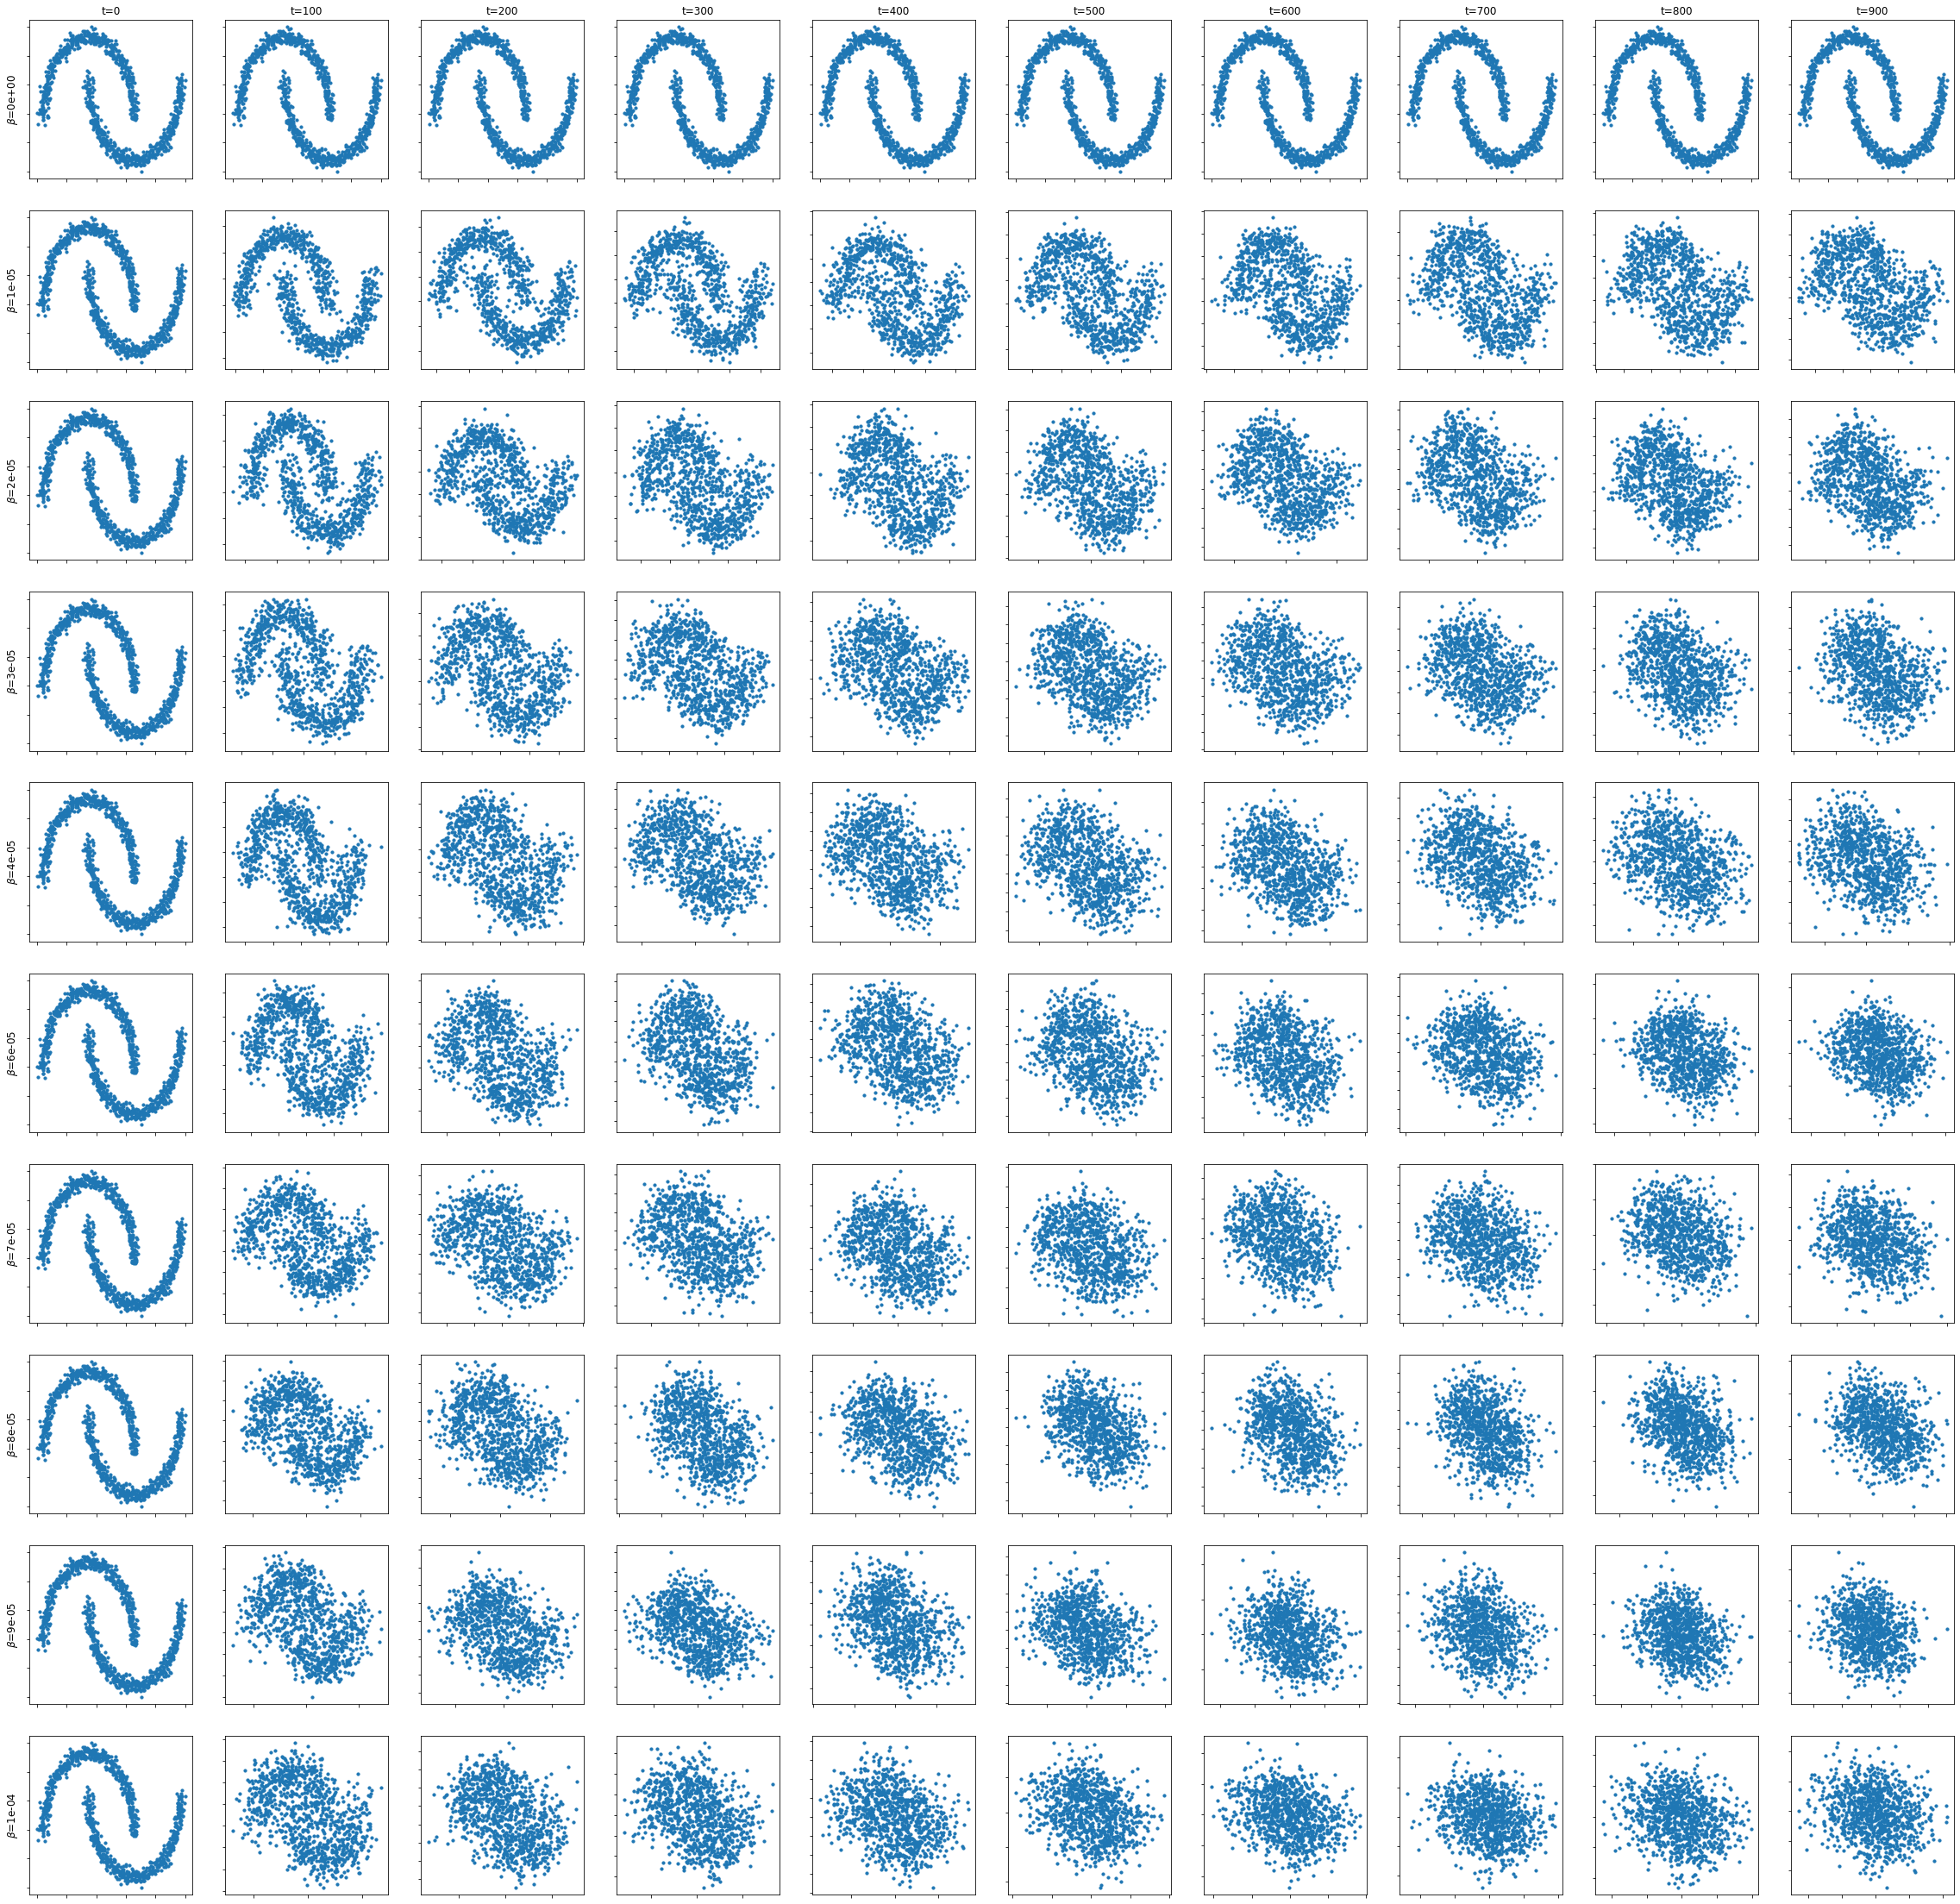

In [298]:
betas = torch.linspace(0, 1e-4, 10)
fig, axes = plt.subplots(len(betas), NB_DISPLAY, figsize=(NB_DISPLAY * 4, len(betas) * 4))

for t in range(NB_DISPLAY):
    axes[0, t].title.set_text(f"t={t * (T // NB_DISPLAY)}")
for i, beta in enumerate(betas):
    for j, X_t in enumerate(forward(X, torch.ones(T) * beta)):
        scatter(X_t, ax=axes[i, j])
    axes[i,0].set_ylabel(f"$\\beta$={beta:.0e}", rotation=90, size='large')

## Linear increasing of $\beta$

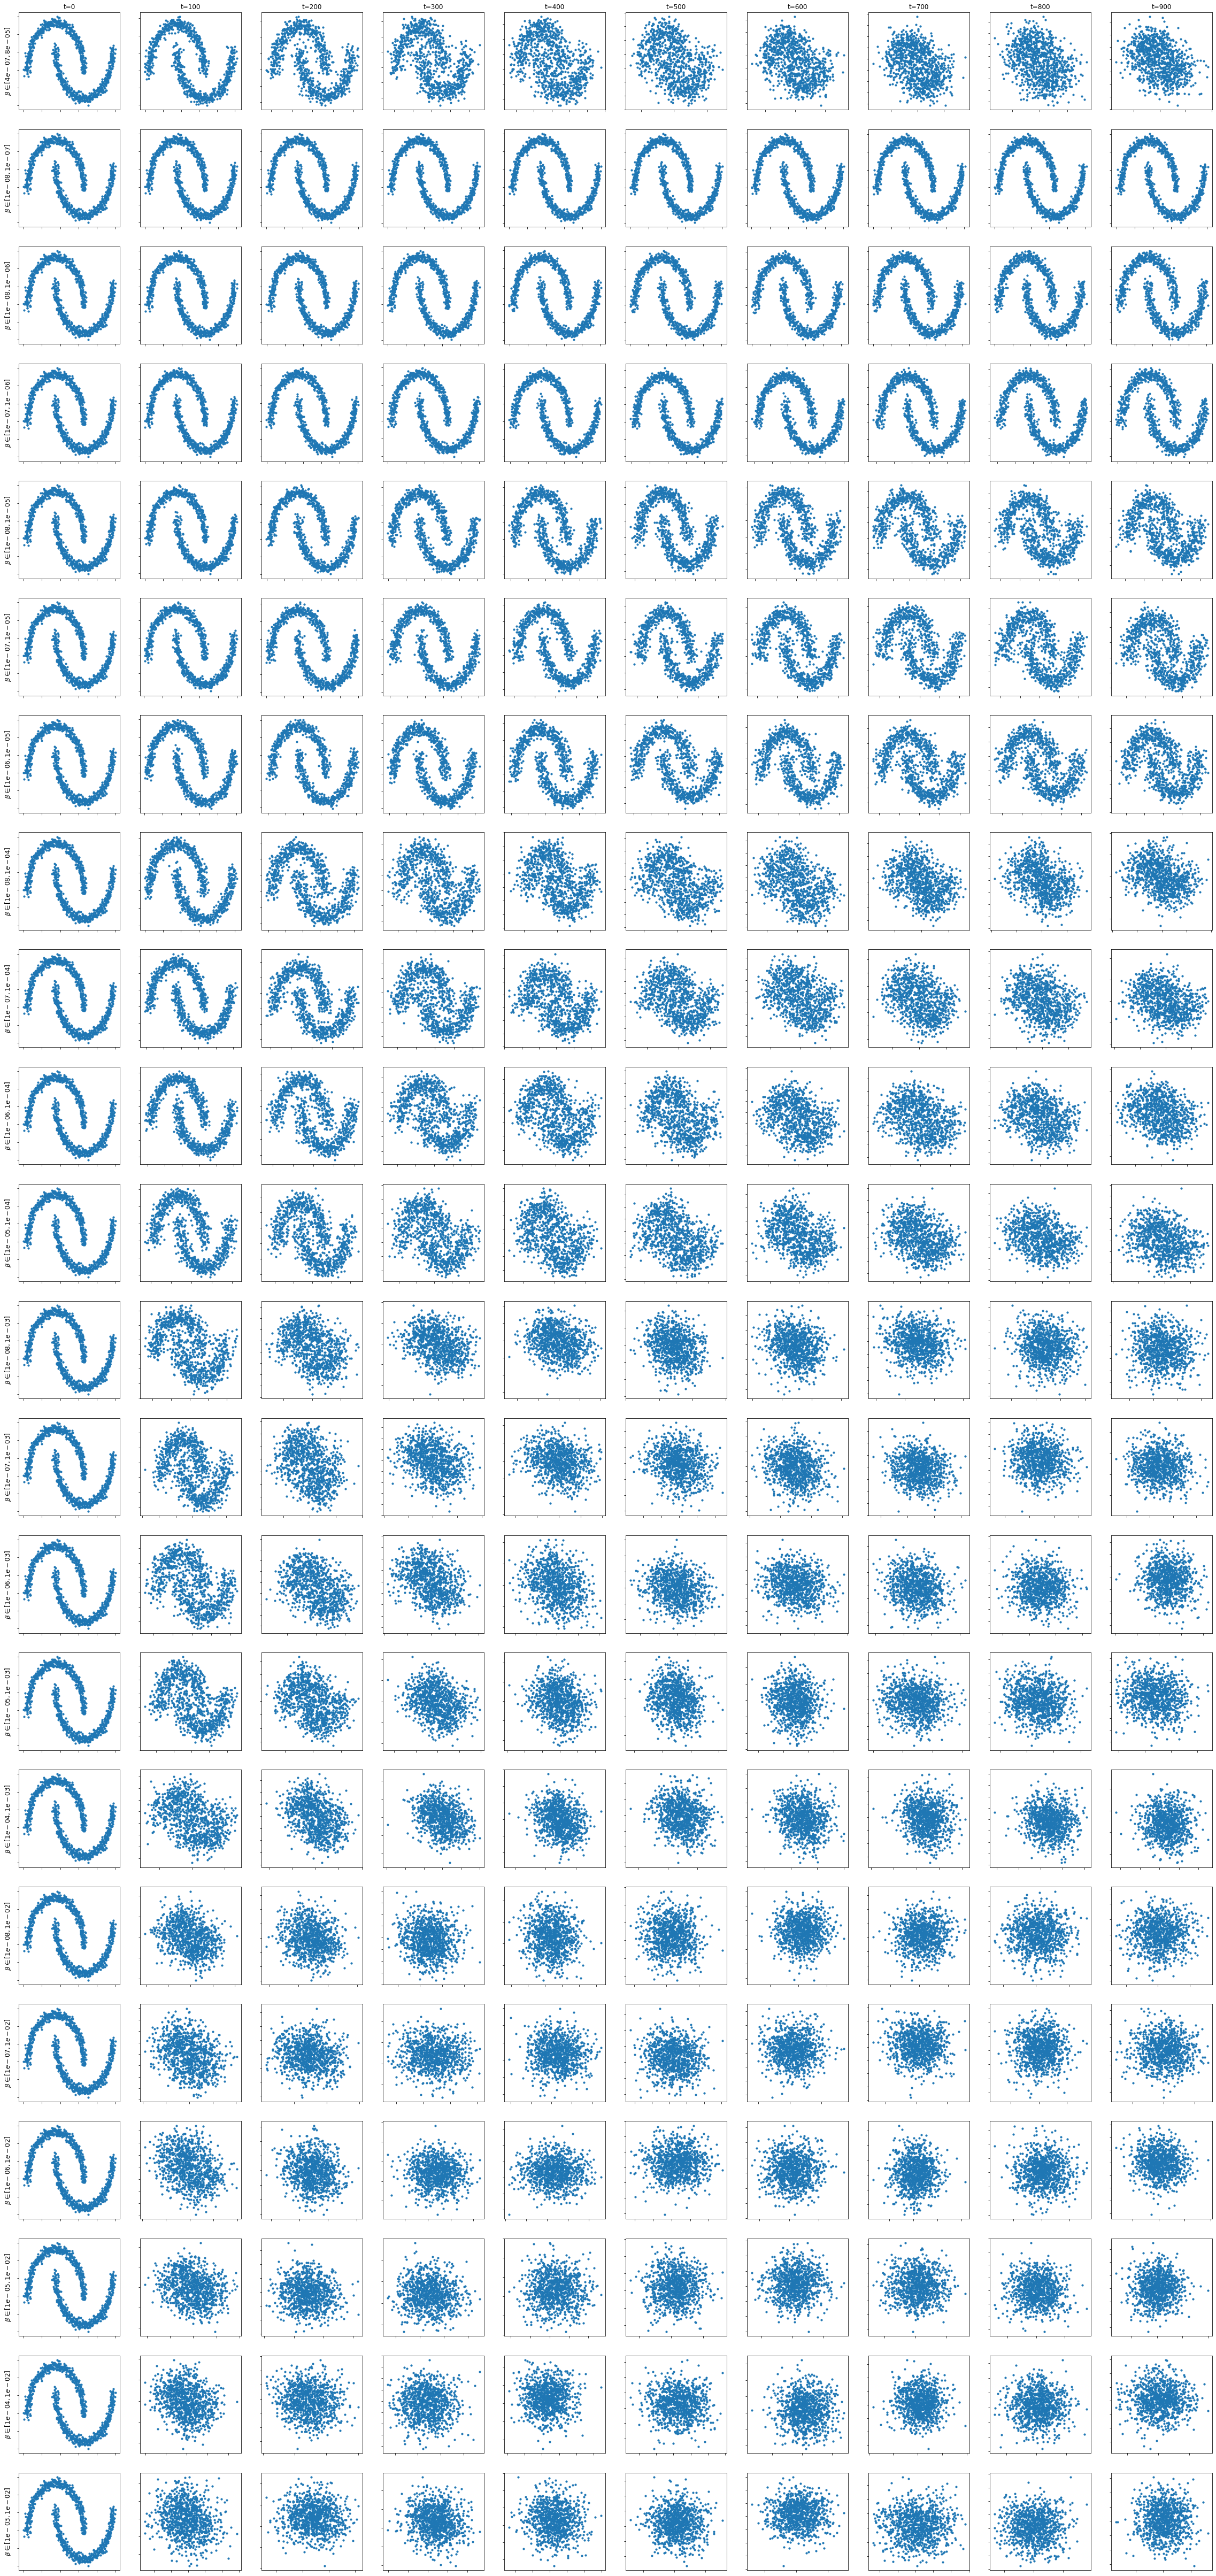

In [306]:
betas_bounds = [
    (1e-4 / 255, 0.02 / 255), # from "Denoising Diffusion Probabilistic Models" paper (division by 255 because of normalization)
    *[(10**a, 10**b) for b in range(-8, -1) for a in range(-8, -1) if a < b] # create a grid of linear increasing betas between 1e-8 and 1e-1
]

fig, axes = plt.subplots(len(betas_bounds), NB_DISPLAY, figsize=(NB_DISPLAY * 4, len(betas_bounds) * 4))

for t in range(NB_DISPLAY):
    axes[0, t].title.set_text(f"t={t * (T // NB_DISPLAY)}")
for i, (a, b) in enumerate(betas_bounds):
    for j, X_t in enumerate(forward(X, torch.linspace(a, b, T))):
        scatter(X_t, ax=axes[i, j])
    axes[i,0].set_ylabel(f"$\\beta \in [{a:.0e}, {b:.0e}]$", rotation=90, size='large')